<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Loading-Tools-and-Data" data-toc-modified-id="Loading-Tools-and-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading Tools and Data</a></span></li><li><span><a href="#Scrubbing" data-toc-modified-id="Scrubbing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Scrubbing</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Crashes-By-Month" data-toc-modified-id="Crashes-By-Month-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Crashes By Month</a></span></li><li><span><a href="#Crashes-By-Hour" data-toc-modified-id="Crashes-By-Hour-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Crashes By Hour</a></span></li><li><span><a href="#Crashes-By-Day" data-toc-modified-id="Crashes-By-Day-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Crashes By Day</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Resample-with-SMOTE" data-toc-modified-id="Resample-with-SMOTE-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Resample with SMOTE</a></span></li><li><span><a href="#Logistic-Regression-with-SMOTE" data-toc-modified-id="Logistic-Regression-with-SMOTE-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Logistic Regression with SMOTE</a></span></li><li><span><a href="#SVM" data-toc-modified-id="SVM-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>SVM</a></span></li><li><span><a href="#XGBOOST" data-toc-modified-id="XGBOOST-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>XGBOOST</a></span></li><li><span><a href="#XGBoost-2" data-toc-modified-id="XGBoost-2-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>XGBoost 2</a></span></li><li><span><a href="#KNN" data-toc-modified-id="KNN-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Decision Trees</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-5.9"><span class="toc-item-num">5.9&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li></ul></div>

## Problem Statement

Predicting INJURY_CLASSIFICATION became the goal for this investigation. Recently, however, we revisited the possible values for injury classification, and found that REPORTED INJURY, NO EVIDENCE was not a feasible class to predict for our purposes, and it only hindered our predictions. The goal of this investigation is to find when injuries do occur, not when people report them without any basis. We decided to indicate anyone classified as REPORTED INJURY, NO EVIDENCE to have NO INDICATION OF INJURY instead.

## Loading Tools and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from datetime import datetime
from dateutil import parser
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
warnings.filterwarnings('ignore')

In [2]:
crashes = pd.read_csv('Data/Traffic_Crashes_-_Crashes.csv', low_memory=False)

In [3]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552917 entries, 0 to 552916
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                552917 non-null  object 
 1   RD_NO                          548608 non-null  object 
 2   CRASH_DATE_EST_I               41871 non-null   object 
 3   CRASH_DATE                     552917 non-null  object 
 4   POSTED_SPEED_LIMIT             552917 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         552917 non-null  object 
 6   DEVICE_CONDITION               552917 non-null  object 
 7   WEATHER_CONDITION              552917 non-null  object 
 8   LIGHTING_CONDITION             552917 non-null  object 
 9   FIRST_CRASH_TYPE               552917 non-null  object 
 10  TRAFFICWAY_TYPE                552917 non-null  object 
 11  LANE_CNT                       198970 non-null  float64
 12  ALIGNMENT                     

In [4]:
crashes.isna().sum()

CRASH_RECORD_ID                       0
RD_NO                              4309
CRASH_DATE_EST_I                 511046
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         353947
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       13912
CRASH_TYPE                            0
INTERSECTION_RELATED_I           427372
NOT_RIGHT_OF_WAY_I               526774
HIT_AND_RUN_I                    385931
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0


In [5]:
crashes.shape

(552917, 49)

## Scrubbing

In [6]:
crashes.duplicated().sum()

0

In [7]:
def nan_columns(df):
    """ Returns the columns that have over 30% of its data as missing value """
    temp = []
    for x in df.columns:
        if df[x].isna().sum() > 0:
            percentage_of_df = df[x].isna().sum()/(list(df.shape)[0])*100
            print("Row: {} : is made {}% of NaN Values.".format(x, percentage_of_df.round(2)))
            if percentage_of_df > 0.3:
                temp.append(x)
    print('')            
    print(temp)

In [8]:
nan_columns(crashes)

Row: RD_NO : is made 0.78% of NaN Values.
Row: CRASH_DATE_EST_I : is made 92.43% of NaN Values.
Row: LANE_CNT : is made 64.01% of NaN Values.
Row: REPORT_TYPE : is made 2.52% of NaN Values.
Row: INTERSECTION_RELATED_I : is made 77.29% of NaN Values.
Row: NOT_RIGHT_OF_WAY_I : is made 95.27% of NaN Values.
Row: HIT_AND_RUN_I : is made 69.8% of NaN Values.
Row: STREET_DIRECTION : is made 0.0% of NaN Values.
Row: STREET_NAME : is made 0.0% of NaN Values.
Row: BEAT_OF_OCCURRENCE : is made 0.0% of NaN Values.
Row: PHOTOS_TAKEN_I : is made 98.76% of NaN Values.
Row: STATEMENTS_TAKEN_I : is made 97.97% of NaN Values.
Row: DOORING_I : is made 99.68% of NaN Values.
Row: WORK_ZONE_I : is made 99.37% of NaN Values.
Row: WORK_ZONE_TYPE : is made 99.5% of NaN Values.
Row: WORKERS_PRESENT_I : is made 99.84% of NaN Values.
Row: NUM_UNITS : is made 0.0% of NaN Values.
Row: MOST_SEVERE_INJURY : is made 0.21% of NaN Values.
Row: INJURIES_TOTAL : is made 0.2% of NaN Values.
Row: INJURIES_FATAL : is made 0

In [9]:

# We are going to drop all the columns with a lot of of NaN values, except for location that we can say right ahead that is
# a multicolinearity case, since it has the Latiutude and Longitude together
crashes = crashes.drop(columns=['CRASH_DATE','CRASH_RECORD_ID', 'RD_NO','REPORT_TYPE', 'DATE_POLICE_NOTIFIED', 'STREET_DIRECTION',
                                'BEAT_OF_OCCURRENCE','LATITUDE', 'LONGITUDE','STREET_NAME',
                                'CRASH_DATE_EST_I', 'LANE_CNT', 'INTERSECTION_RELATED_I',
                                'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'PHOTOS_TAKEN_I', 
                                'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE',
                                'WORKERS_PRESENT_I', 'LOCATION','SEC_CONTRIBUTORY_CAUSE', 'RD_NO', 'REPORT_TYPE',
                                'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
                                'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'STREET_NO', 'NUM_UNITS', 'CRASH_TYPE',
                                'INJURIES_TOTAL', 'INJURIES_FATAL', 'DEVICE_CONDITION'])

In [10]:
crashes.dropna(inplace=True)

In [11]:
crashes

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,"OVER $1,500",IMPROPER BACKING,NO INDICATION OF INJURY,17,4,7
1,35,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,NO INDICATION OF INJURY,16,6,6
2,30,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,NO INDICATION OF INJURY,10,6,7
3,30,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,$500 OR LESS,UNABLE TO DETERMINE,NO INDICATION OF INJURY,1,7,7
4,20,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DRIVEWAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,"OVER $1,500",UNABLE TO DETERMINE,NO INDICATION OF INJURY,14,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552912,10,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,$500 OR LESS,NOT APPLICABLE,NO INDICATION OF INJURY,18,2,7
552913,30,TRAFFIC SIGNAL,UNKNOWN,UNKNOWN,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,$500 OR LESS,DISREGARDING TRAFFIC SIGNALS,NO INDICATION OF INJURY,21,4,7
552914,30,NO CONTROLS,CLEAR,DAYLIGHT,REAR TO SIDE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,"OVER $1,500",UNABLE TO DETERMINE,"REPORTED, NOT EVIDENT",10,2,7
552915,15,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,"OVER $1,500",UNABLE TO DETERMINE,NO INDICATION OF INJURY,16,3,7


In [12]:
crashes.WEATHER_CONDITION.value_counts()

CLEAR                       439106
RAIN                         47487
UNKNOWN                      24460
SNOW                         20280
CLOUDY/OVERCAST              16298
OTHER                         1675
FOG/SMOKE/HAZE                 851
SLEET/HAIL                     720
FREEZING RAIN/DRIZZLE          642
BLOWING SNOW                   165
SEVERE CROSS WIND GATE          94
BLOWING SAND, SOIL, DIRT         2
Name: WEATHER_CONDITION, dtype: int64

In [13]:
#merging the values  and printing the value counts after merge
crashes['WEATHER_CONDITION'] = crashes['WEATHER_CONDITION'].replace({'UNKNOWN':'UNKNOWN/OTHER','OTHER':'UNKNOWN/OTHER',
                                                     'FREEZING RAIN/DRIZZLE': 'SLEET/HAIL',
                                                     'BLOWING SNOW': 'SNOW',
                                                      'SEVERE CROSS WIND GATE': 'CLOUDY/OVERCAST',
                                                     'BLOWING SAND, SOIL, DIRT': 'UNKNOWN/OTHER'})
crashes['WEATHER_CONDITION'].value_counts()

CLEAR              439106
RAIN                47487
UNKNOWN/OTHER       26137
SNOW                20445
CLOUDY/OVERCAST     16392
SLEET/HAIL           1362
FOG/SMOKE/HAZE        851
Name: WEATHER_CONDITION, dtype: int64

In [14]:
crashes['ROADWAY_SURFACE_COND'].value_counts()

DRY                415521
WET                 72956
UNKNOWN             37457
SNOW OR SLUSH       20388
ICE                  3921
OTHER                1304
SAND, MUD, DIRT       233
Name: ROADWAY_SURFACE_COND, dtype: int64

In [15]:
#merging the values and printing the new value counts
crashes['ROADWAY_SURFACE_COND'] =crashes['ROADWAY_SURFACE_COND'].replace({'UNKNOWN':'UNKNOWN/OTHER',
                                                                 'OTHER':'UNKNOWN/OTHER',
                                                               'SAND, MUD, DIRT': 'UNKNOWN/OTHER',
                                                                 'ICE': 'SNOW OR SLUSH'})
crashes['ROADWAY_SURFACE_COND'].value_counts()

DRY              415521
WET               72956
UNKNOWN/OTHER     38994
SNOW OR SLUSH     24309
Name: ROADWAY_SURFACE_COND, dtype: int64

In [16]:
#printing value_counts
crashes['TRAFFIC_CONTROL_DEVICE'].value_counts()

NO CONTROLS                 317609
TRAFFIC SIGNAL              153381
STOP SIGN/FLASHER            54760
UNKNOWN                      17995
OTHER                         3377
LANE USE MARKING              1223
YIELD                          779
OTHER REG. SIGN                567
OTHER WARNING SIGN             497
RAILROAD CROSSING GATE         358
PEDESTRIAN CROSSING SIGN       257
POLICE/FLAGMAN                 203
SCHOOL ZONE                    181
DELINEATORS                    181
FLASHING CONTROL SIGNAL        179
OTHER RAILROAD CROSSING        130
RR CROSSING SIGN                60
NO PASSING                      26
BICYCLE CROSSING SIGN           17
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64

In [17]:
#merging and replacing values, printing the new value counts
crashes['TRAFFIC_CONTROL_DEVICE']=crashes['TRAFFIC_CONTROL_DEVICE'].replace(
                            {'UNKNOWN':'UNKNOWN/OTHER',
                            'OTHER':'UNKNOWN/OTHER',
                            'FLASHING CONTROL SIGNAL':'STOP SIGN/FALSHER',
                              'OTHER RAILROAD CROSSING':'RAILROAD CROSSING GATE'})
crashes['TRAFFIC_CONTROL_DEVICE'].value_counts()

NO CONTROLS                 317609
TRAFFIC SIGNAL              153381
STOP SIGN/FLASHER            54760
UNKNOWN/OTHER                21372
LANE USE MARKING              1223
YIELD                          779
OTHER REG. SIGN                567
OTHER WARNING SIGN             497
RAILROAD CROSSING GATE         488
PEDESTRIAN CROSSING SIGN       257
POLICE/FLAGMAN                 203
SCHOOL ZONE                    181
DELINEATORS                    181
STOP SIGN/FALSHER              179
RR CROSSING SIGN                60
NO PASSING                      26
BICYCLE CROSSING SIGN           17
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64

In [18]:
#Printing value counts
crashes['ROAD_DEFECT'].value_counts()

NO DEFECTS           456885
UNKNOWN               83140
RUT, HOLES             4759
OTHER                  3099
WORN SURFACE           2265
SHOULDER DEFECT        1169
DEBRIS ON ROADWAY       463
Name: ROAD_DEFECT, dtype: int64

In [19]:
#merging and replacing the values 
crashes['ROAD_DEFECT'] = crashes['ROAD_DEFECT'].replace({'UNKNOWN':'UNKNOWN/OTHER',
                            'OTHER':'UNKNOWN/OTHER'})
#printing the new value counts
crashes['ROAD_DEFECT'].value_counts()

NO DEFECTS           456885
UNKNOWN/OTHER         86239
RUT, HOLES             4759
WORN SURFACE           2265
SHOULDER DEFECT        1169
DEBRIS ON ROADWAY       463
Name: ROAD_DEFECT, dtype: int64

In [20]:
#printing value counts
crashes['TRAFFICWAY_TYPE'].value_counts()

NOT DIVIDED                        244457
DIVIDED - W/MEDIAN (NOT RAISED)     95384
ONE-WAY                             72826
PARKING LOT                         38685
DIVIDED - W/MEDIAN BARRIER          32613
FOUR WAY                            21499
OTHER                               15407
ALLEY                                9043
UNKNOWN                              6066
T-INTERSECTION                       4584
CENTER TURN LANE                     4505
DRIVEWAY                             1887
RAMP                                 1749
UNKNOWN INTERSECTION TYPE            1229
FIVE POINT, OR MORE                   531
Y-INTERSECTION                        525
TRAFFIC ROUTE                         395
NOT REPORTED                          185
ROUNDABOUT                            135
L-INTERSECTION                         75
Name: TRAFFICWAY_TYPE, dtype: int64

In [21]:
# merged the different types of intersections into one feature and unknown/other into one feature
crashes['TRAFFICWAY_TYPE'] = crashes['TRAFFICWAY_TYPE'].replace({'T-INTERSECTION':'INTERSECTION', 'UNKNOWN INTERSECTION TYPE':'INTERSECTION',
                                                'Y-INTERSECTION':'INTERSECTION','L-INTERSECTION':'INTERSECTION',
                                                 'FIVE POINT, OR MORE': 'INTERSECTION', 'FOUR WAY':'INTERSECTION',
                                                 'ROUNDABOUT': 'INTERSECTION', 'OTHER': 'UNKNOWN/OTHER',
                                                'UNKNOWN':'UNKNOWN/OTHER','NOT REPORTED':'UNKNOWN/OTHER',
                                                'TRAFFIC ROUTE':'UNKNOWN/OTHER'})
#printing new value counts
crashes.TRAFFICWAY_TYPE.value_counts()

NOT DIVIDED                        244457
DIVIDED - W/MEDIAN (NOT RAISED)     95384
ONE-WAY                             72826
PARKING LOT                         38685
DIVIDED - W/MEDIAN BARRIER          32613
INTERSECTION                        28578
UNKNOWN/OTHER                       22053
ALLEY                                9043
CENTER TURN LANE                     4505
DRIVEWAY                             1887
RAMP                                 1749
Name: TRAFFICWAY_TYPE, dtype: int64

In [22]:
# Bining Posted_Speed_Limit
crashes.POSTED_SPEED_LIMIT.value_counts()

30    405826
35     37879
25     33931
20     22072
15     19465
10     12138
0       6895
40      5113
5       3903
45      3349
55       521
3        135
50       123
9         92
99        66
39        61
1         36
60        31
24        25
2         22
32        15
34        13
65        12
33        10
11         8
6          7
36         5
12         3
14         3
70         3
18         2
38         2
22         2
7          2
4          2
31         2
26         2
49         1
23         1
63         1
29         1
Name: POSTED_SPEED_LIMIT, dtype: int64

In [23]:
# Let's bin the speed limit in 4 groups, the last one being 45 miles/hour or above
crashes.POSTED_SPEED_LIMIT = pd.cut(crashes.POSTED_SPEED_LIMIT,[0, 20, 25, 40, 45],
                                    precision=0, labels=[0, 1, 2, 3])

In [24]:
crashes.POSTED_SPEED_LIMIT.value_counts()

2    448929
0     57890
1     33959
3      3349
Name: POSTED_SPEED_LIMIT, dtype: int64

In [25]:
crashes['POSTED_SPEED_LIMIT'].isnull().sum()

7653

In [26]:
crashes['POSTED_SPEED_LIMIT'] = crashes['POSTED_SPEED_LIMIT'].fillna(0)

In [27]:
crashes['POSTED_SPEED_LIMIT'].isnull().values.any()

False

In [28]:
crashes.MOST_SEVERE_INJURY.value_counts()

NO INDICATION OF INJURY     478855
NONINCAPACITATING INJURY     40820
REPORTED, NOT EVIDENT        22285
INCAPACITATING INJURY         9258
FATAL                          562
Name: MOST_SEVERE_INJURY, dtype: int64

In [29]:
crashes['MOST_SEVERE_INJURY'] = np.where(crashes['MOST_SEVERE_INJURY']=='REPORTED, NOT EVIDENT',
                                         'NONINCAPACITATING INJURY', crashes['MOST_SEVERE_INJURY'])

In [30]:
crashes['MOST_SEVERE_INJURY'] = np.where(crashes['MOST_SEVERE_INJURY']=='INCAPACITATING INJURY',
                                         'NONINCAPACITATING INJURY', crashes['MOST_SEVERE_INJURY'])

In [31]:
crashes.MOST_SEVERE_INJURY.value_counts()

NO INDICATION OF INJURY     478855
NONINCAPACITATING INJURY     72363
FATAL                          562
Name: MOST_SEVERE_INJURY, dtype: int64

In [32]:
#mapping

In [33]:
#crashes[‘MOST_SEVERE_INJURY’] = crashes[‘MOST_SEVERE_INJURY’].map({'NO INDICATION OF INJURY' :0, 'NONINCAPACITATING INJURY' :1, 'FATAL' :2}).astype(int)
#mapping numbers
#crashes.head()

## EDA

In [34]:
pass 
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use('seaborn')
sns.set_theme(style="whitegrid")
sns.set_color_codes("muted")



def crashes_by_hour(crashes):
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.style.use('seaborn')
    sns.set_theme(style="whitegrid")
    sns.set_color_codes("muted")
    import pandas as pd
    crash_no_inj = crashes[crashes['injuries_total'] == 0]
    crash_inj = crashes[crashes['injuries_total'] > 0]

    crash_no_inj = crash_no_inj.groupby('crash_hour').sum()
    crash_inj = crash_inj.groupby('crash_hour').sum()

    cni = crash_no_inj['num_units']
    cyi = crash_inj['num_units']

    cni = pd.DataFrame(cni)
    cyi = pd.DataFrame(cyi)

    f, ax = plt.subplots(figsize=(10, 10))

    sns.set_color_codes("muted")
    sns.barplot(x=cni.index, y="num_units", data=cni,
                label="No Injury Accidents", color="m")

    sns.set_color_codes("muted")
    sns.barplot(x=cyi.index, y="num_units", data=cyi,
                label="Injury Accidents", color="r")

    ax.legend(ncol=2, loc="lower right", frameon=True)
    ax.set(ylabel="Crashes", xlabel="Hour")
    sns.despine(left=True, bottom=True)


def crashes_by_day(crashes):
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.style.use('seaborn')
    sns.set_theme(style="whitegrid")
    sns.set_color_codes("muted")
    import pandas as pd
    import calendar
    crash_no_inj = crashes[crashes['injuries_total'] == 0]
    crash_inj = crashes[crashes['injuries_total'] > 0]

    crash_no_inj = crash_no_inj.groupby('crash_day_of_week').sum()
    crash_inj = crash_inj.groupby('crash_day_of_week').sum()

    cni = crash_no_inj['num_units']
    cyi = crash_inj['num_units']

    cni = pd.DataFrame(cni)
    cyi = pd.DataFrame(cyi)

    f, ax = plt.subplots(figsize=(10, 10))

    sns.set_color_codes("muted")
    sns.barplot(x=cni.index, y="num_units", data=cni,
                label="No Injury Accidents", color="m")

    sns.set_color_codes("muted")
    sns.barplot(x=cyi.index, y="num_units", data=cyi,
                label="Injury Accidents", color="r")

    ax.legend(ncol=2, loc="upper right", frameon=True)
    ax.set(ylabel="Crashes", xlabel="Day of Week")
    sns.despine(left=True, bottom=True)
    xticks = list(calendar.day_name)[-1:]+list(calendar.day_name)[:6]
    ax.set_xticklabels(xticks, rotation=45)
    sns.set(rc={'axes.facecolor': 'white', 'figure.facecolor': 'white'})


def crashes_by_damage(crashes):
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns
    plt.style.use('seaborn')
    sns.set_theme(style="whitegrid")
    sns.set_color_codes("muted")
    import pandas as pd
    crashes.damage.value_counts().plot.bar(color='tab:purple')
    plt.title('Number of Crashes based on Crash Estimated Damage')
    plt.xlabel('Damage (Estimated by Reporting Officer)')


def crashes_by_lighting_condition(crashes):
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns
    import pandas as pd
    plt.style.use('seaborn')
    sns.set_theme(style="whitegrid")
    sns.set_color_codes("muted")
    vc = crashes.lighting_condition.value_counts()
    vc.sort_values(ascending=False).plot.bar(color='tab:purple')
    plt.title('Number of Crashes based on Lighting Condition')


def top_10_crash_sites(crashes):

    fig, ax = plt.subplots(figsize=(10, 6))

    street_names = crashes.street_name.value_counts(sort=True).index[:10]
    crash_frequency = crashes.street_name.value_counts(sort=True).values[:10]

    ax.barh(street_names, crash_frequency, color='tab:purple')
    ax.set_title('Top 10 Crash Sites (Street Names), Chicago IL', size=15)
    ax.set_yticklabels(street_names)
    ax.invert_yaxis()
    ax.set_xlabel('Number of Crashes')
    ax.set_ylabel('Street Name')



In [37]:
crashes.columns

Index(['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'MOST_SEVERE_INJURY', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH'],
      dtype='object')

### Crashes By Hour

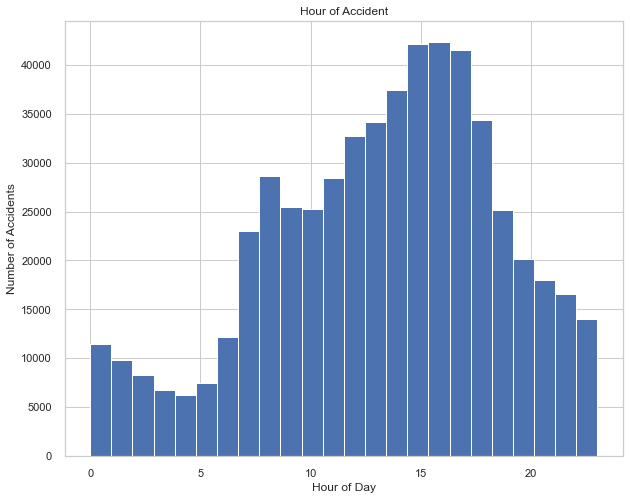

In [46]:
# CRASH_HOUR histogram plot
plt.figure(figsize=(10,8))
crashes['CRASH_HOUR'].plot(kind = 'hist', bins = 24)
plt.title('Hour of Accident')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

### Crashes By Day

([<matplotlib.axis.XTick at 0x7fb51bee3a90>,
 [Text(0, 0, 'Sun'),
  Text(1, 0, 'Mon'),
  Text(2, 0, 'Tue'),
  Text(3, 0, 'Wed'),
  Text(4, 0, 'Thr'),
  Text(5, 0, 'Fri'),
  Text(6, 0, 'Sat')])

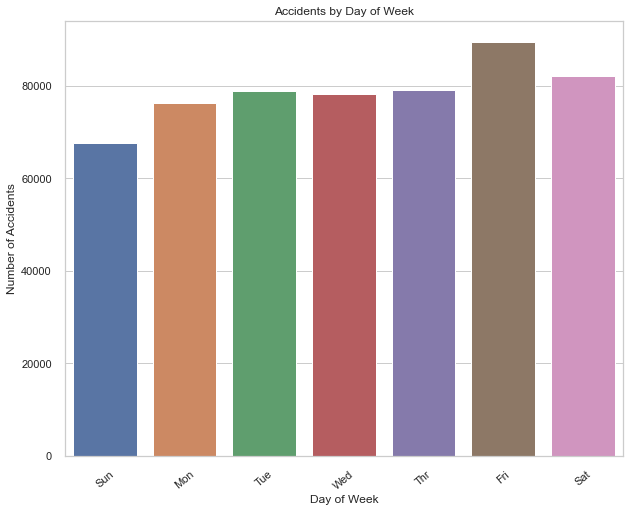

In [47]:
#counterplot of CRASH_DAY_OF_WEEK
plt.figure(figsize=(10,8))
sns.countplot(x= "CRASH_DAY_OF_WEEK" , data=crashes)
plt.title('Accidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.xticks(np.arange(7), ('Sun','Mon','Tue','Wed','Thr','Fri','Sat'), 
           rotation=40)

In [44]:
#crashes.info()

In [39]:
### Crash Causes

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'UNABLE TO DETERMINE'),
  Text(1, 0, 'FAILING TO YIELD RIGHT-OF-WAY'),
  Text(2, 0, 'FOLLOWING TOO CLOSELY'),
  Text(3, 0, 'NOT APPLICABLE'),
  Text(4, 0, 'IMPROPER OVERTAKING/PASSING'),
  Text(5, 0, 'FAILING TO REDUCE SPEED TO AVOID CRASH'),
  Text(6, 0, 'IMPROPER BACKING'),
  Text(7, 0, 'IMPROPER LANE USAGE'),
  Text(8, 0, 'IMPROPER TURNING/NO SIGNAL'),
  Text(9, 0, 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE')])

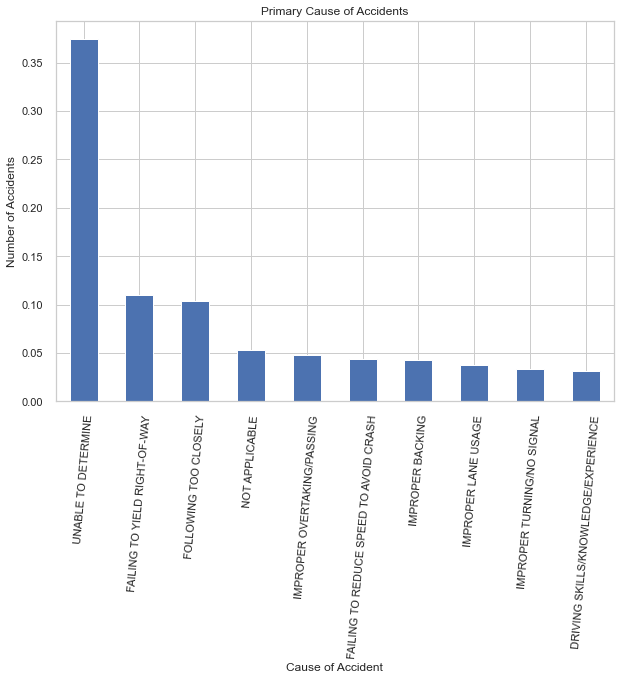

In [40]:
#bar plot of Primary contributory cause
crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts(normalize = True).head(10).plot(kind = 'bar', figsize = (10,7))
plt.title('Primary Cause of Accidents')
plt.xlabel('Cause of Accident')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=85)

In [41]:
### Crashes by Season

In [42]:
#binning the CRASH_MONTH
month_bins = [1,4,7,10,13]
label=('Winter','Spring','Summer','Fall')
month_binned = pd.cut(crashes['CRASH_MONTH'], month_bins, labels= label)
month_binned= month_binned.cat.as_unordered()
crashes['SEASON']= month_binned

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Winter'),
  Text(1, 0, 'Spring'),
  Text(2, 0, 'Summer'),
  Text(3, 0, 'Fall')])

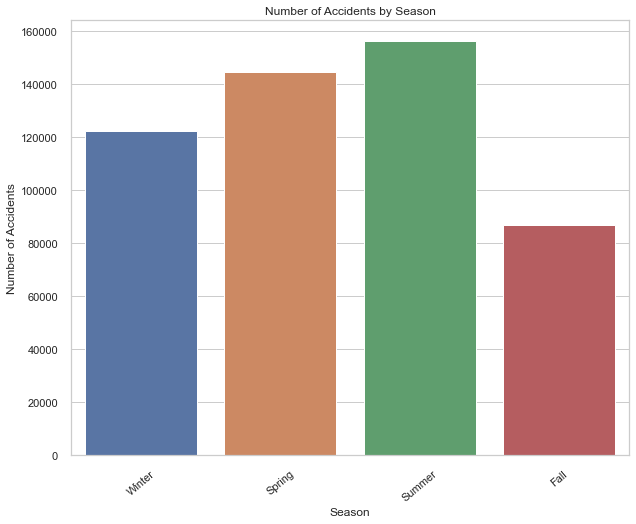

In [45]:
plt.figure(figsize=(10,8))
sns.countplot(x="SEASON", data=crashes)
plt.title('Number of Accidents by Season')
plt.xlabel('Season')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=40)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'CLEAR'),
  Text(1, 0, 'RAIN'),
  Text(2, 0, 'UNKNOWN/OTHER'),
  Text(3, 0, 'SNOW'),
  Text(4, 0, 'CLOUDY/OVERCAST'),
  Text(5, 0, 'SLEET/HAIL'),
  Text(6, 0, 'FOG/SMOKE/HAZE')])

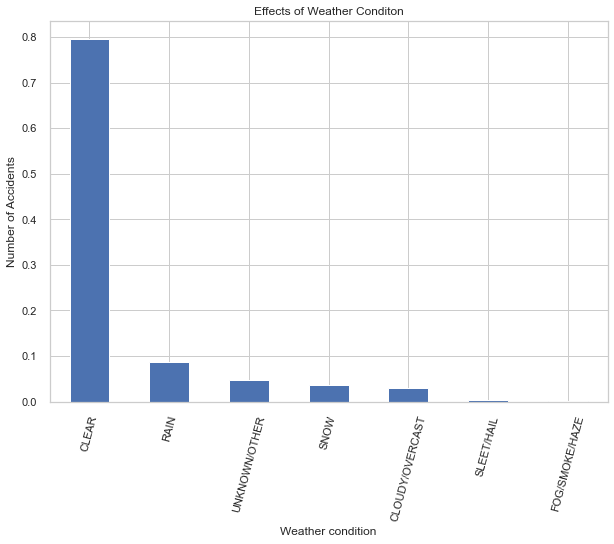

In [51]:
#bar plot of WEATHER_CONDITION
crashes['WEATHER_CONDITION'].value_counts(normalize = True).head(10).plot(kind = 'bar', figsize = (10,7))
plt.title('Effects of Weather Conditon')
plt.xlabel('Weather condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=75)

## Model

In [45]:
crashes

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,2,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,"OVER $1,500",IMPROPER BACKING,NO INDICATION OF INJURY,17,4,7
1,2,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,NO INDICATION OF INJURY,16,6,6
2,2,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,NO INDICATION OF INJURY,10,6,7
3,2,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,$500 OR LESS,UNABLE TO DETERMINE,NO INDICATION OF INJURY,1,7,7
4,0,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DRIVEWAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,"OVER $1,500",UNABLE TO DETERMINE,NO INDICATION OF INJURY,14,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552912,0,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,$500 OR LESS,NOT APPLICABLE,NO INDICATION OF INJURY,18,2,7
552913,2,TRAFFIC SIGNAL,UNKNOWN/OTHER,UNKNOWN,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN/OTHER,UNKNOWN/OTHER,$500 OR LESS,DISREGARDING TRAFFIC SIGNALS,NO INDICATION OF INJURY,21,4,7
552914,2,NO CONTROLS,CLEAR,DAYLIGHT,REAR TO SIDE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,"OVER $1,500",UNABLE TO DETERMINE,NONINCAPACITATING INJURY,10,2,7
552915,0,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,"OVER $1,500",UNABLE TO DETERMINE,NO INDICATION OF INJURY,16,3,7


In [155]:
#creating the dummies
dummies=['TRAFFIC_CONTROL_DEVICE', 'WEATHER_CONDITION', 
         'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE' , 'TRAFFICWAY_TYPE', 
         'ROADWAY_SURFACE_COND', 'ALIGNMENT',
         'ROAD_DEFECT', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE']
crashes =  pd.get_dummies(crashes, columns = dummies, drop_first = True )

In [156]:
crashes

,POSTED_SPEED_LIMIT,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,TRAFFIC_CONTROL_DEVICE_DELINEATORS,TRAFFIC_CONTROL_DEVICE_LANE USE MARKING,TRAFFIC_CONTROL_DEVICE_NO CONTROLS,TRAFFIC_CONTROL_DEVICE_NO PASSING,TRAFFIC_CONTROL_DEVICE_OTHER REG. SIGN,TRAFFIC_CONTROL_DEVICE_OTHER WARNING SIGN,TRAFFIC_CONTROL_DEVICE_PEDESTRIAN CROSSING SIGN,TRAFFIC_CONTROL_DEVICE_POLICE/FLAGMAN,TRAFFIC_CONTROL_DEVICE_RAILROAD CROSSING GATE,TRAFFIC_CONTROL_DEVICE_RR CROSSING SIGN,TRAFFIC_CONTROL_DEVICE_SCHOOL ZONE,TRAFFIC_CONTROL_DEVICE_STOP SIGN/FALSHER,TRAFFIC_CONTROL_DEVICE_STOP SIGN/FLASHER,TRAFFIC_CONTROL_DEVICE_TRAFFIC SIGNAL,TRAFFIC_CONTROL_DEVICE_UNKNOWN/OTHER,TRAFFIC_CONTROL_DEVICE_YIELD,WEATHER_CONDITION_CLOUDY/OVERCAST,WEATHER_CONDITION_FOG/SMOKE/HAZE,WEATHER_CONDITION_RAIN,WEATHER_CONDITION_SLEET/HAIL,WEATHER_CONDITION_SNOW,WEATHER_CONDITION_UNKNOWN/OTHER,"LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD",LIGHTING_CONDITION_DAWN,LIGHTING_CONDITION_DAYLIGHT,LIGHTING_CONDITION_DUSK,LIGHTING_CONDITION_UNKNOWN,FIRST_CRASH_TYPE_ANIMAL,FIRST_CRASH_TYPE_FIXED OBJECT,FIRST_CRASH_TYPE_HEAD ON,FIRST_CRASH_TYPE_OTHER NONCOLLISION,FIRST_CRASH_TYPE_OTHER OBJECT,FIRST_CRASH_TYPE_OVERTURNED,FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE,FIRST_CRASH_TYPE_PEDALCYCLIST,FIRST_CRASH_TYPE_PEDESTRIAN,FIRST_CRASH_TYPE_REAR END,FIRST_CRASH_TYPE_REAR TO FRONT,FIRST_CRASH_TYPE_REAR TO REAR,FIRST_CRASH_TYPE_REAR TO SIDE,FIRST_CRASH_TYPE_SIDESWIPE OPPOSITE DIRECTION,FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION,FIRST_CRASH_TYPE_TRAIN,FIRST_CRASH_TYPE_TURNING,TRAFFICWAY_TYPE_CENTER TURN LANE,TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN (NOT RAISED),TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN BARRIER,TRAFFICWAY_TYPE_DRIVEWAY,TRAFFICWAY_TYPE_INTERSECTION,TRAFFICWAY_TYPE_NOT DIVIDED,TRAFFICWAY_TYPE_ONE-WAY,TRAFFICWAY_TYPE_PARKING LOT,TRAFFICWAY_TYPE_RAMP,TRAFFICWAY_TYPE_UNKNOWN/OTHER,ROADWAY_SURFACE_COND_SNOW OR SLUSH,ROADWAY_SURFACE_COND_UNKNOWN/OTHER,ROADWAY_SURFACE_COND_WET,ALIGNMENT_CURVE ON HILLCREST,"ALIGNMENT_CURVE, LEVEL",ALIGNMENT_STRAIGHT AND LEVEL,ALIGNMENT_STRAIGHT ON GRADE,ALIGNMENT_STRAIGHT ON HILLCREST,ROAD_DEFECT_NO DEFECTS,"ROAD_DEFECT_RUT, HOLES",ROAD_DEFECT_SHOULDER DEFECT,ROAD_DEFECT_UNKNOWN/OTHER,ROAD_DEFECT_WORN SURFACE,"DAMAGE_$501 - $1,500","DAMAGE_OVER $1,500",PRIM_CONTRIBUTORY_CAUSE_BICYCLE ADVANCING LEGALLY ON RED LIGHT,PRIM_CONTRIBUTORY_CAUSE_CELL PHONE USE OTHER THAN TEXTING,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING OTHER TRAFFIC SIGNS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING ROAD MARKINGS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING STOP SIGN,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING TRAFFIC SIGNALS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING YIELD SIGN,PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - FROM INSIDE VEHICLE,PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - FROM OUTSIDE VEHICLE,"PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)",PRIM_CONTRIBUTORY_CAUSE_DRIVING ON WRONG SIDE/WRONG WAY,PRIM_CONTRIBUTORY_CAUSE_DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,PRIM_CONTRIBUTORY_CAUSE_EQUIPMENT - VEHICLE CONDITION,"PRIM_CONTRIBUTORY_CAUSE_EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST",PRIM_CONTRIBUTORY_CAUSE_EXCEEDING AUTHORIZED SPEED LIMIT,PRIM_CONTRIBUTORY_CAUSE_EXCEEDING SAFE SPEED FOR CONDITIONS,PRIM_CONTRIBUTORY_CAUSE_FAILING TO REDUCE SPEED TO AVOID CRASH,PRIM_CONTRIBUTORY_CAUSE_FAILING TO YIELD RIGHT-OF-WAY,PRIM_CONTRIBUTORY_CAUSE_FOLLOWING TOO CLOSELY,PRIM_CONTRIBUTORY_CAUSE_HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE),PRIM_CONTRIBUTORY_CAUSE_IMPROPER BACKING,PRIM_CONTRIBUTORY_CAUSE_IMPROPER LANE USAGE,PRIM_CONTRIBUTORY_CAUSE_IMPROPER OVERTAKING/PASSING,PRIM_CONTRIBUTORY_CAUSE_IMPROPER TURNING/NO SIGNAL,PRIM_CONTRIBUTORY_CAUSE_MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT,PRIM_CONTRIBUTORY_CAUSE_NOT APPLICABLE,PRIM_CONTRIBUTORY_CAUSE_OBSTRUCTED CROSSWALKS,"PRIM_CONTRIBUTORY_CAUSE_OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER",PRIM_CONTRIBUTORY_CAUSE_PASSING STOPPED SCHOOL BUS,PRIM_CONTRIBUTORY_CAUSE_PHYSICAL CONDITION OF DRIV

In [157]:
#saving and converting the cleaned dataframe to csv file
crashes.to_csv('crashes_cleaned_data', index_label=False)

In [ ]:
#from sklearn import preprocessing
#y = preprocessing.label_binarize(y, classes=[0, 1, 2])

### Logistic Regression

In [64]:
#importing skitlearn modulus
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics

#load all necessary libraries
import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

In [65]:
crashes = pd.read_csv('crashes_cleaned_data', low_memory=False)

In [10]:
#Create training and test datasets
#CLASS was recoded into SIZE_CLASS to change from string to integer
#CLASS needs to be dropped
X = crashes.drop(columns=['MOST_SEVERE_INJURY'], axis=1)
y = crashes['MOST_SEVERE_INJURY']

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

['POSTED_SPEED_LIMIT', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'TRAFFIC_CONTROL_DEVICE_DELINEATORS', 'TRAFFIC_CONTROL_DEVICE_LANE USE MARKING', 'TRAFFIC_CONTROL_DEVICE_NO CONTROLS', 'TRAFFIC_CONTROL_DEVICE_NO PASSING', 'TRAFFIC_CONTROL_DEVICE_OTHER REG. SIGN', 'TRAFFIC_CONTROL_DEVICE_OTHER WARNING SIGN', 'TRAFFIC_CONTROL_DEVICE_PEDESTRIAN CROSSING SIGN', 'TRAFFIC_CONTROL_DEVICE_POLICE/FLAGMAN', 'TRAFFIC_CONTROL_DEVICE_RAILROAD CROSSING GATE', 'TRAFFIC_CONTROL_DEVICE_RR CROSSING SIGN', 'TRAFFIC_CONTROL_DEVICE_SCHOOL ZONE', 'TRAFFIC_CONTROL_DEVICE_STOP SIGN/FALSHER', 'TRAFFIC_CONTROL_DEVICE_STOP SIGN/FLASHER', 'TRAFFIC_CONTROL_DEVICE_TRAFFIC SIGNAL', 'TRAFFIC_CONTROL_DEVICE_UNKNOWN/OTHER', 'TRAFFIC_CONTROL_DEVICE_YIELD', 'WEATHER_CONDITION_CLOUDY/OVERCAST', 'WEATHER_CONDITION_FOG/SMOKE/HAZE', 'WEATHER_CONDITION_RAIN', 'WEATHER_CONDITION_SLEET/HAIL', 'WEATHER_CONDITION_SNOW', 'WEATHER_CONDITION_UNKNOWN/OTHER', 'LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD', 'LIGHTING_CONDITION_DAWN

In [185]:
model1 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_train, y_train)
preds = model1.predict(X_test)

#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = model1.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [186]:
confusion_matrix(y_test, preds)

array([[    0,    71,    38],
       [    0, 94651,  1061],
       [    0, 11054,  3481]])

In [187]:
confmtrx = np.array(confusion_matrix(y_test, preds))

In [188]:
pd.DataFrame(confmtrx, index=['Fatal', 'Non_INCAPACITATING', 'No_Injury'],
columns=['predicted_fatal', 'predicted_incapacitating','predicted_no_inury'])

,predicted_fatal,predicted_incapacitating,predicted_no_inury
Fatal,0,71,38
Non_INCAPACITATING,0,94651,1061
No_Injury,0,11054,3481


Here we can see that our model is predicting fatal car accidents as ones where no-injury occurred. NOT GOOD.

In [189]:
print("f1 score Train:",metrics.f1_score(y_train, model1.predict(X_train), average='micro'))
print("f1 score  Test:",metrics.f1_score(y_test, preds, average='micro'))

f1 score Train: 0.8898247489941643
f1 score  Test: 0.8892312153394469


In [190]:
#printing classifiction report of logistic regression
print(classification_report(y_test, preds))

                          precision    recall  f1-score   support

                   FATAL       0.00      0.00      0.00       109
 NO INDICATION OF INJURY       0.89      0.99      0.94     95712
NONINCAPACITATING INJURY       0.76      0.24      0.36     14535

                accuracy                           0.89    110356
               macro avg       0.55      0.41      0.43    110356
            weighted avg       0.88      0.89      0.86    110356



In [4]:
import pickle

In [193]:
filename = 'regression_model.sav'
pickle.dump(model1, open(filename, 'wb'))

In [11]:
# load the model from disk
loaded_model = pickle.load(open('regression_model.sav', 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

NameError: name 'Y_test' is not defined

### Resample with SMOTE

In [69]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

### Logistic Regression with SMOTE

In [27]:
#model2 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='lbfgs', n_jobs=-1).fit(X_resampled_train, y_resampled_train)
#preds2 = model2.predict(X_test)

In [85]:
crashes = pd.read_csv('crashes_cleaned_data', low_memory=False)

In [110]:
# define pipeline
model = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='lbfgs', n_jobs=-1)
over = SMOTE("minority")
under = RandomUnderSampler('majority')
steps = [('over', over), ('under', under), ('model', model)]
clf = Pipeline(steps=steps)

In [111]:
y = crashes['MOST_SEVERE_INJURY']
X = crashes.drop(columns=['MOST_SEVERE_INJURY'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 50 )

In [112]:
clf.fit(X_train, y_train)

Pipeline(steps=[('over', SMOTE(sampling_strategy='minority')),
                ('under', RandomUnderSampler(sampling_strategy='majority')),
                ('model',
                 LogisticRegression(multi_class='multinomial', n_jobs=-1,
                                    penalty='none', random_state=0))])

In [113]:
clf.score(X_train, y_train)

0.8814382543767444

In [115]:
model.score(X_test, y_test)

0.8809525535539526

In [119]:
# Predict on training and test sets
training_preds = clf.predict(X_train)
test_preds = model.predict(X_test)

In [121]:
#printing classifiction report of logistic regression
print(classification_report(y_train, training_preds))

                          precision    recall  f1-score   support

                   FATAL       0.01      0.10      0.02       412
 NO INDICATION OF INJURY       0.90      0.98      0.94    359104
NONINCAPACITATING INJURY       0.74      0.23      0.35     54319

                accuracy                           0.88    413835
               macro avg       0.55      0.44      0.44    413835
            weighted avg       0.88      0.88      0.86    413835



In [122]:
print(classification_report(y_test, test_preds))

                          precision    recall  f1-score   support

                   FATAL       0.01      0.06      0.01       150
 NO INDICATION OF INJURY       0.90      0.98      0.94    119751
NONINCAPACITATING INJURY       0.73      0.23      0.35     18044

                accuracy                           0.88    137945
               macro avg       0.54      0.42      0.43    137945
            weighted avg       0.87      0.88      0.86    137945



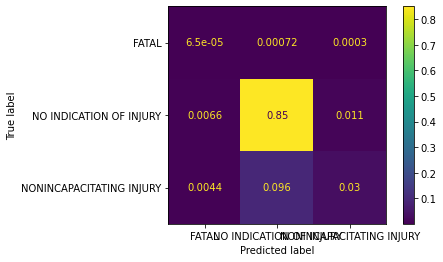

In [123]:
plot_confusion_matrix(model, X_test, y_test, normalize='all')

In [126]:
confmtrx = np.array(confusion_matrix(y_test, test_preds))

In [127]:
pd.DataFrame(confmtrx, index=['Fatal', 'Non_INCAPACITATING', 'No_Injury'],
columns=['predicted_fatal', 'predicted_incapacitating','predicted_no_inury'])

,predicted_fatal,predicted_incapacitating,predicted_no_inury
Fatal,9,99,42
Non_INCAPACITATING,906,117337,1508
No_Injury,611,13256,4177


Some improvement, but model still couldnt prediict fatal accidents

In [128]:
print("f1 score Train:",metrics.f1_score(y_train, clf.predict(X_train), average='micro'))
print("f1 score  Test:",metrics.f1_score(y_test, test_preds, average='micro'))

f1 score Train: 0.8814382543767444
f1 score  Test: 0.8809525535539526


In [129]:
from sklearn.metrics import multilabel_confusion_matrix

Try ADASYN 

### SVM

### XGBOOST

In [131]:
crashes = pd.read_csv('crashes_cleaned_data', low_memory=False)

In [132]:
import xgboost as xgb
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [133]:

# grid search positive class weights with xgboost for imbalance classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [134]:
# define pipeline
model_xgb = XGBClassifier()
over = SMOTE("minority")
under = RandomUnderSampler('majority')
steps = [('over', over), ('under', under), ('model_xgb', model_xgb)]
clf_xgb = Pipeline(steps=steps)

In [135]:
X = crashes.drop(columns=['MOST_SEVERE_INJURY'], axis=1)
y = crashes['MOST_SEVERE_INJURY']

In [136]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 42)

In [137]:
from collections import Counter
# summarize class distribution
counter = Counter(y_train)
print(counter)

Counter({'NO INDICATION OF INJURY': 383143, 'NONINCAPACITATING INJURY': 57828, 'FATAL': 453})


In [138]:
clf_xgb.fit(X_train, y_train)

Pipeline(steps=[('over', SMOTE(sampling_strategy='minority')),
                ('under', RandomUnderSampler(sampling_strategy='majority')),
                ('model_xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=1, tree_method='exac

In [143]:
# Predict on training and test sets
training_preds = clf_xgb.predict(X_train)
test_preds = model_xgb.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 89.1%
Validation accuracy: 88.8%


In [146]:
print(classification_report(y_train, training_preds))

                          precision    recall  f1-score   support

                   FATAL       0.04      0.09      0.06       453
 NO INDICATION OF INJURY       0.90      0.99      0.94    383143
NONINCAPACITATING INJURY       0.78      0.26      0.39     57828

                accuracy                           0.89    441424
               macro avg       0.57      0.45      0.46    441424
            weighted avg       0.88      0.89      0.87    441424



In [144]:
print(classification_report(y_test, test_preds))

                          precision    recall  f1-score   support

                   FATAL       0.01      0.02      0.01       109
 NO INDICATION OF INJURY       0.90      0.99      0.94     95712
NONINCAPACITATING INJURY       0.75      0.25      0.37     14535

                accuracy                           0.89    110356
               macro avg       0.55      0.42      0.44    110356
            weighted avg       0.88      0.89      0.86    110356



In [145]:
confmtrx = np.array(confusion_matrix(y_test, test_preds))

pd.DataFrame(confmtrx, index=['Fatal', 'Non_INCAPACITATING', 'No_Injury'],
columns=['predicted_fatal', 'predicted_incapacitating','predicted_no_inury'])

,predicted_fatal,predicted_incapacitating,predicted_no_inury
Fatal,2,68,39
Non_INCAPACITATING,152,94410,1150
No_Injury,88,10866,3581


### XGBoost 2

In [151]:
X = crashes.drop(columns=['MOST_SEVERE_INJURY'], axis=1)
y = crashes['MOST_SEVERE_INJURY']

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 42)

In [154]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y = crashes['MOST_SEVERE_INJURY'] #provide your own target name
)


In [155]:
sample_weights

array([0.38409679, 0.38409679, 0.38409679, ..., 2.54172252, 0.38409679,
       0.38409679])

In [156]:
y = crashes['MOST_SEVERE_INJURY']
X = crashes.drop(columns=['MOST_SEVERE_INJURY'], axis=1)

X_train, X_test, y_train, y_test, sw_train, sw_test = train_test_split(X, y, sample_weights, random_state=42)

In [157]:
# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(X_train, y_train, sample_weight=sw_train)

# Predict on training and test sets
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 72.43%
Validation accuracy: 71.82%


In [160]:
print(classification_report(y_train, training_preds))

                          precision    recall  f1-score   support

                   FATAL       0.03      0.98      0.07       429
 NO INDICATION OF INJURY       0.95      0.73      0.83    359171
NONINCAPACITATING INJURY       0.30      0.69      0.41     54235

                accuracy                           0.72    413835
               macro avg       0.43      0.80      0.44    413835
            weighted avg       0.87      0.72      0.77    413835



In [158]:
print(classification_report(y_test, test_preds))

                          precision    recall  f1-score   support

                   FATAL       0.01      0.37      0.02       133
 NO INDICATION OF INJURY       0.95      0.73      0.82    119684
NONINCAPACITATING INJURY       0.29      0.67      0.40     18128

                accuracy                           0.72    137945
               macro avg       0.42      0.59      0.42    137945
            weighted avg       0.86      0.72      0.77    137945



In [161]:
confusion_matrix(y_test, test_preds)

array([[   49,    15,    69],
       [ 2793, 86870, 30021],
       [ 1308,  4664, 12156]])

In [162]:
confmtrx = np.array(confusion_matrix(y_test, test_preds))

In [163]:
pd.DataFrame(confmtrx, index=['Fatal', 'Non_INCAPACITATING', 'No_Injury'],
columns=['predicted_fatal', 'predicted_incapacitating','predicted_no_inury'])

,predicted_fatal,predicted_incapacitating,predicted_no_inury
Fatal,49,15,69
Non_INCAPACITATING,2793,86870,30021
No_Injury,1308,4664,12156


In [ ]:
# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(X_train, y_train)

# Predict on training and test sets
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))


In [ ]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

### Decision Trees

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [67]:
y = crashes['MOST_SEVERE_INJURY']
X = crashes.drop('MOST_SEVERE_INJURY', axis=1)
X.head()

,POSTED_SPEED_LIMIT,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,TRAFFIC_CONTROL_DEVICE_DELINEATORS,TRAFFIC_CONTROL_DEVICE_LANE USE MARKING,TRAFFIC_CONTROL_DEVICE_NO CONTROLS,TRAFFIC_CONTROL_DEVICE_NO PASSING,TRAFFIC_CONTROL_DEVICE_OTHER REG. SIGN,TRAFFIC_CONTROL_DEVICE_OTHER WARNING SIGN,TRAFFIC_CONTROL_DEVICE_PEDESTRIAN CROSSING SIGN,TRAFFIC_CONTROL_DEVICE_POLICE/FLAGMAN,TRAFFIC_CONTROL_DEVICE_RAILROAD CROSSING GATE,TRAFFIC_CONTROL_DEVICE_RR CROSSING SIGN,TRAFFIC_CONTROL_DEVICE_SCHOOL ZONE,TRAFFIC_CONTROL_DEVICE_STOP SIGN/FALSHER,TRAFFIC_CONTROL_DEVICE_STOP SIGN/FLASHER,TRAFFIC_CONTROL_DEVICE_TRAFFIC SIGNAL,TRAFFIC_CONTROL_DEVICE_UNKNOWN/OTHER,TRAFFIC_CONTROL_DEVICE_YIELD,WEATHER_CONDITION_CLOUDY/OVERCAST,WEATHER_CONDITION_FOG/SMOKE/HAZE,WEATHER_CONDITION_RAIN,WEATHER_CONDITION_SLEET/HAIL,WEATHER_CONDITION_SNOW,WEATHER_CONDITION_UNKNOWN/OTHER,"LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD",LIGHTING_CONDITION_DAWN,LIGHTING_CONDITION_DAYLIGHT,LIGHTING_CONDITION_DUSK,LIGHTING_CONDITION_UNKNOWN,FIRST_CRASH_TYPE_ANIMAL,FIRST_CRASH_TYPE_FIXED OBJECT,FIRST_CRASH_TYPE_HEAD ON,FIRST_CRASH_TYPE_OTHER NONCOLLISION,FIRST_CRASH_TYPE_OTHER OBJECT,FIRST_CRASH_TYPE_OVERTURNED,FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE,FIRST_CRASH_TYPE_PEDALCYCLIST,FIRST_CRASH_TYPE_PEDESTRIAN,FIRST_CRASH_TYPE_REAR END,FIRST_CRASH_TYPE_REAR TO FRONT,FIRST_CRASH_TYPE_REAR TO REAR,FIRST_CRASH_TYPE_REAR TO SIDE,FIRST_CRASH_TYPE_SIDESWIPE OPPOSITE DIRECTION,FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION,FIRST_CRASH_TYPE_TRAIN,FIRST_CRASH_TYPE_TURNING,TRAFFICWAY_TYPE_CENTER TURN LANE,TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN (NOT RAISED),TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN BARRIER,TRAFFICWAY_TYPE_DRIVEWAY,TRAFFICWAY_TYPE_INTERSECTION,TRAFFICWAY_TYPE_NOT DIVIDED,TRAFFICWAY_TYPE_ONE-WAY,TRAFFICWAY_TYPE_PARKING LOT,TRAFFICWAY_TYPE_RAMP,TRAFFICWAY_TYPE_UNKNOWN/OTHER,ROADWAY_SURFACE_COND_SNOW OR SLUSH,ROADWAY_SURFACE_COND_UNKNOWN/OTHER,ROADWAY_SURFACE_COND_WET,ALIGNMENT_CURVE ON HILLCREST,"ALIGNMENT_CURVE, LEVEL",ALIGNMENT_STRAIGHT AND LEVEL,ALIGNMENT_STRAIGHT ON GRADE,ALIGNMENT_STRAIGHT ON HILLCREST,ROAD_DEFECT_NO DEFECTS,"ROAD_DEFECT_RUT, HOLES",ROAD_DEFECT_SHOULDER DEFECT,ROAD_DEFECT_UNKNOWN/OTHER,ROAD_DEFECT_WORN SURFACE,"DAMAGE_$501 - $1,500","DAMAGE_OVER $1,500",PRIM_CONTRIBUTORY_CAUSE_BICYCLE ADVANCING LEGALLY ON RED LIGHT,PRIM_CONTRIBUTORY_CAUSE_CELL PHONE USE OTHER THAN TEXTING,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING OTHER TRAFFIC SIGNS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING ROAD MARKINGS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING STOP SIGN,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING TRAFFIC SIGNALS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING YIELD SIGN,PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - FROM INSIDE VEHICLE,PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - FROM OUTSIDE VEHICLE,"PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)",PRIM_CONTRIBUTORY_CAUSE_DRIVING ON WRONG SIDE/WRONG WAY,PRIM_CONTRIBUTORY_CAUSE_DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,PRIM_CONTRIBUTORY_CAUSE_EQUIPMENT - VEHICLE CONDITION,"PRIM_CONTRIBUTORY_CAUSE_EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST",PRIM_CONTRIBUTORY_CAUSE_EXCEEDING AUTHORIZED SPEED LIMIT,PRIM_CONTRIBUTORY_CAUSE_EXCEEDING SAFE SPEED FOR CONDITIONS,PRIM_CONTRIBUTORY_CAUSE_FAILING TO REDUCE SPEED TO AVOID CRASH,PRIM_CONTRIBUTORY_CAUSE_FAILING TO YIELD RIGHT-OF-WAY,PRIM_CONTRIBUTORY_CAUSE_FOLLOWING TOO CLOSELY,PRIM_CONTRIBUTORY_CAUSE_HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE),PRIM_CONTRIBUTORY_CAUSE_IMPROPER BACKING,PRIM_CONTRIBUTORY_CAUSE_IMPROPER LANE USAGE,PRIM_CONTRIBUTORY_CAUSE_IMPROPER OVERTAKING/PASSING,PRIM_CONTRIBUTORY_CAUSE_IMPROPER TURNING/NO SIGNAL,PRIM_CONTRIBUTORY_CAUSE_MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT,PRIM_CONTRIBUTORY_CAUSE_NOT APPLICABLE,PRIM_CONTRIBUTORY_CAUSE_OBSTRUCTED CROSSWALKS,"PRIM_CONTRIBUTORY_CAUSE_OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER",PRIM_CONTRIBUTORY_CAUSE_PASSING STOPPED SCHOOL BUS,PRIM_CONTRIBUTORY_CAUSE_PHYSICAL CONDITION OF DRIVER,PRIM_CONTRIBUTOR

In [68]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [69]:
dt_clf = DecisionTreeClassifier()

dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3, n_jobs=-1)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 81.80%


In [70]:
dt_param_grid = {
    'criterion': ['gini'],
    'max_depth': [None, 2, 3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 3, 4]
}

In [71]:
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True, n_jobs=-1)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [None, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5]},
             return_train_score=True)

In [72]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 89.96%
Mean Test Score: 88.99%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [73]:
"""
{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}
"""

"\n{'criterion': 'gini',\n 'max_depth': 2,\n 'min_samples_leaf': 1,\n 'min_samples_split': 2}\n"

In [74]:
# Predict on the test set
test_preds = dt_grid_search.predict(X_test)

In [75]:
confmtrx = np.array(confusion_matrix(y_test, test_preds))

pd.DataFrame(confmtrx, index=['Fatal', 'Non_INCAPACITATING', 'No_Injury'],
columns=['predicted_fatal', 'predicted_incapacitating','predicted_no_inury'])

,predicted_fatal,predicted_incapacitating,predicted_no_inury
Fatal,0,95,38
Non_INCAPACITATING,0,118631,1053
No_Injury,0,14004,4124


### Random Forest

In [76]:
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=3, n_jobs=-1))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 87.74%


In [77]:
rf_param_grid = {
    'n_estimators': [30],
    'criterion': ['gini'],
    'max_depth': [None],
    'min_samples_split': [5],
    'min_samples_leaf': [1]
}

In [78]:
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accuracy: 88.45%

Optimal Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 30}


Training Accuracy: 99.90%

Optimal Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 30}

In [79]:
dt_score = dt_grid_search.score(X_test, y_test)
rf_score = rf_grid_search.score(X_test, y_test)

print('Decision tree grid search: ', dt_score)
print('Random forest grid search: ', rf_score)

Decision tree grid search:  0.8898836492805103
Random forest grid search:  0.8839102540867737


In [80]:
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=3, n_jobs=-1))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 87.75%


In [81]:
dt_score = dt_grid_search.score(X_test, y_test)
rf_score = rf_grid_search.score(X_test, y_test)

print('Decision tree grid search: ', dt_score)
print('Random forest grid search: ', rf_score)

Decision tree grid search:  0.8898836492805103
Random forest grid search:  0.8839102540867737


In [82]:
# Test set predictions
pred = rf_grid_search.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[     0     82     51]
 [     0 117122   2562]
 [     1  13318   4809]]
                          precision    recall  f1-score   support

                   FATAL       0.00      0.00      0.00       133
 NO INDICATION OF INJURY       0.90      0.98      0.94    119684
NONINCAPACITATING INJURY       0.65      0.27      0.38     18128

                accuracy                           0.88    137945
               macro avg       0.52      0.41      0.44    137945
            weighted avg       0.86      0.88      0.86    137945



In [87]:
# Feature importance
importances = rf_grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
x_value =[]
y_value = []

for f in range(X_test.shape[1]):
    print(X_test.columns[indices[f]], "  -  ", importances[indices[f]])
    x_value.append( X_test.columns[indices[f]])
    y_value.append( importances[indices[f]])

CRASH_HOUR   -   0.1486389618734031
FIRST_CRASH_TYPE_PEDESTRIAN   -   0.1403706133391087
CRASH_MONTH   -   0.1261923245106718
CRASH_DAY_OF_WEEK   -   0.09625279077733756
FIRST_CRASH_TYPE_PEDALCYCLIST   -   0.054688859693421
POSTED_SPEED_LIMIT   -   0.019494996962108383
DAMAGE_$501 - $1,500   -   0.01770097541404126
FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE   -   0.016273359436965118
DAMAGE_OVER $1,500   -   0.015393679101314702
FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION   -   0.01502201309509968
ROADWAY_SURFACE_COND_WET   -   0.013791527642105101
TRAFFICWAY_TYPE_NOT DIVIDED   -   0.010983290625726647
TRAFFIC_CONTROL_DEVICE_NO CONTROLS   -   0.010679569505545094
FIRST_CRASH_TYPE_REAR END   -   0.010578412404970875
TRAFFICWAY_TYPE_INTERSECTION   -   0.010254141279439811
LIGHTING_CONDITION_DAYLIGHT   -   0.010016605145807277
WEATHER_CONDITION_RAIN   -   0.009897967662650753
FIRST_CRASH_TYPE_TURNING   -   0.009677338025268515
PRIM_CONTRIBUTORY_CAUSE_DISREGARDING TRAFFIC SIGNALS   -   0.00952287

Text(0.5, 1.0, 'Top 15 Important Features')

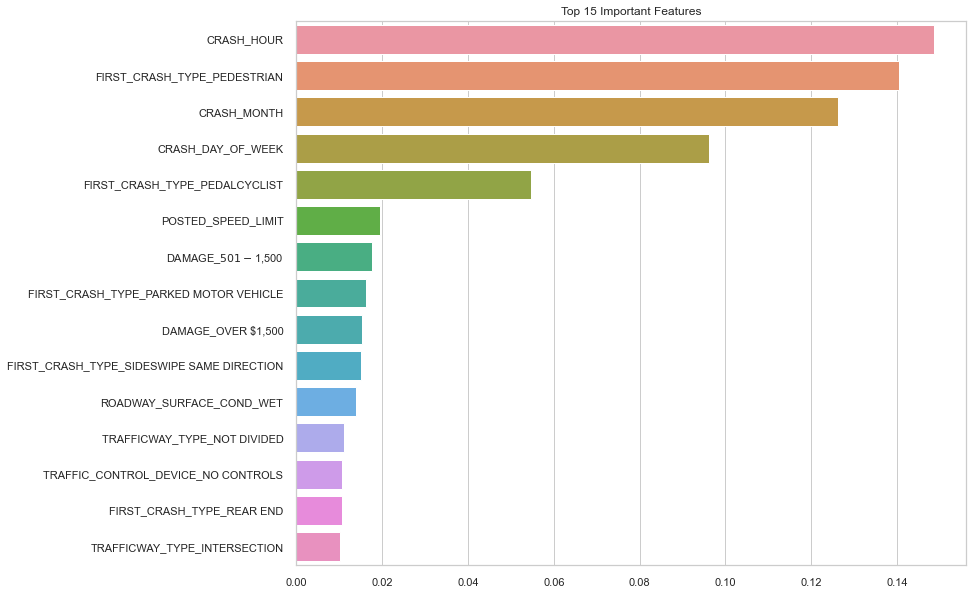

In [88]:
#plotting the top 15 important Features of the Decision Tree of resampled data
plt.figure(figsize = (12,10))
sns.barplot(y=x_value[:15], x=y_value[:15])
plt.title("Top 15 Important Features")